Integrace funkce jedné proměnné

Zadání:
V oblasti přírodních a sociálních věd je velice důležitým pojmem integrál, který představuje funkci součtů malých změn (počet nakažených covidem za čas, hustota monomerů daného typu při posouvání se v řetízku polymeru, aj.). Integraci lze provádět pro velmi jednoduché funkce prostým Riemannovým součtem, avšak pro složitější funkce je nutné využít pokročilé metody. Vaším úkolem je vybrat si 3 různorodé funkce (polynom, harmonická funkce, logaritmus/exponenciála) a vypočíst určitý integrál na dané funkci od nějakého počátku do nějakého konečného bodu. Porovnejte, jak si každá z metod poradila s vámi vybranou funkcí na základě přesnosti vůči analytickému řešení.

In [ ]:
!python -m pip install numpy
!python -m pip install matplotlib
!python -m pip install scipy
!python -m pip install norm

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from scipy.stats import norm

In [3]:
integral = integrate.quad(lambda x: 1/x, 1, 2)
print(integral)

(0.6931471805599454, 7.695479593116622e-15)


In [4]:
x = np.arange(1, 10, 0.01)
f = lambda x: 1/x
y = f(x)
cum = integrate.cumtrapz(y, x, initial=0.1)

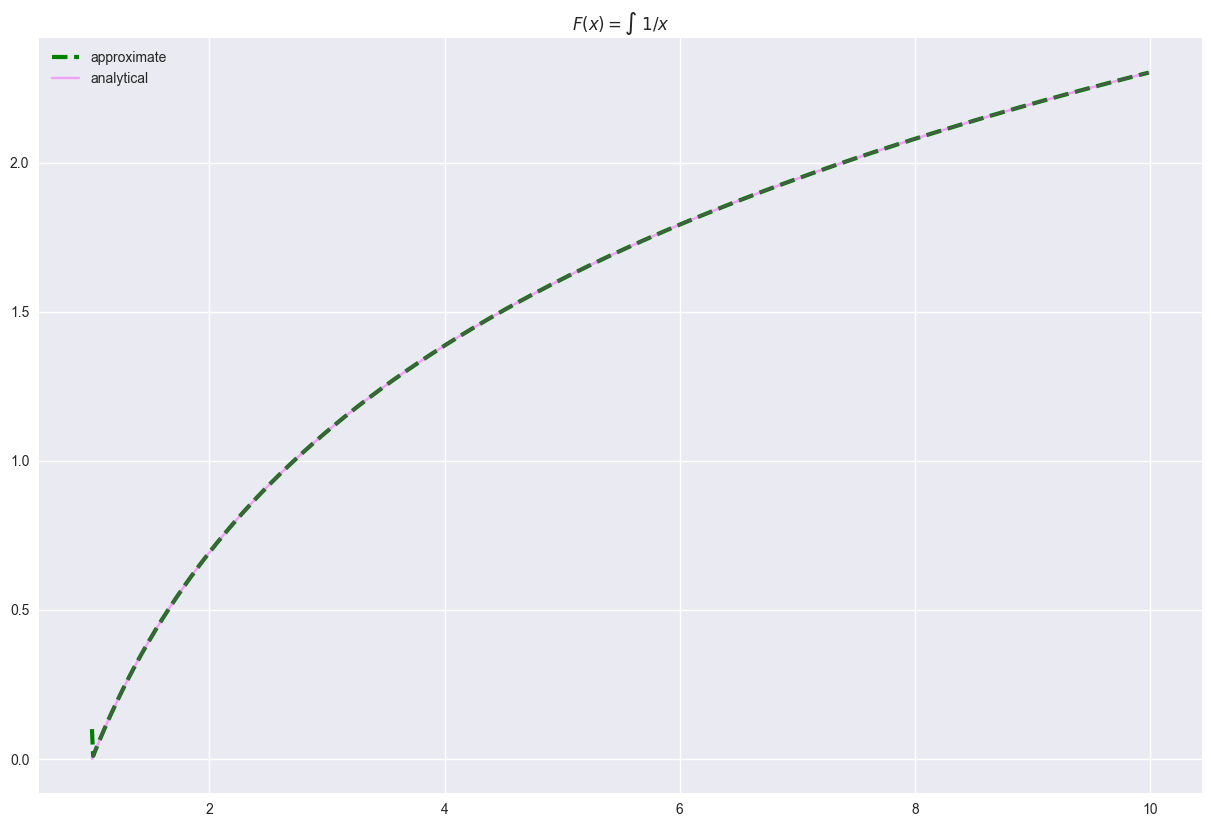

In [5]:
plt.style.use('seaborn')
plt.figure(figsize=(15,10), dpi=100)
plt.plot(x, cum,'--',color='green', alpha=1, lw=3, label='approximate')
plt.plot(x, np.log(x), color='magenta', alpha=0.3, label='analytical')
plt.title("$F(x) = \int \; 1/x$")
plt.legend()
plt.show()

In [6]:
error = abs(cum-np.log(x))
np.mean(error)

0.00011860643216036486

Jak je vidět, chyba je nepatrná pro volbu velikosti kroku. Lichoběžníková metoda má chybu O(h^2). Takže když snížíme velikost kroku, chyba by se měla zlepšit v řádu h^2.

Gaussova standardní funkce normálního kumulativního rozdělení

In [7]:
f = lambda x: 1/(np.sqrt(2*np.pi))*np.exp(-x**2)
x = np.arange(-2,2,0.0001)
y = f(x)

In [15]:
cum = integrate.cumtrapz(y, x)
analytical = norm.cdf(x)

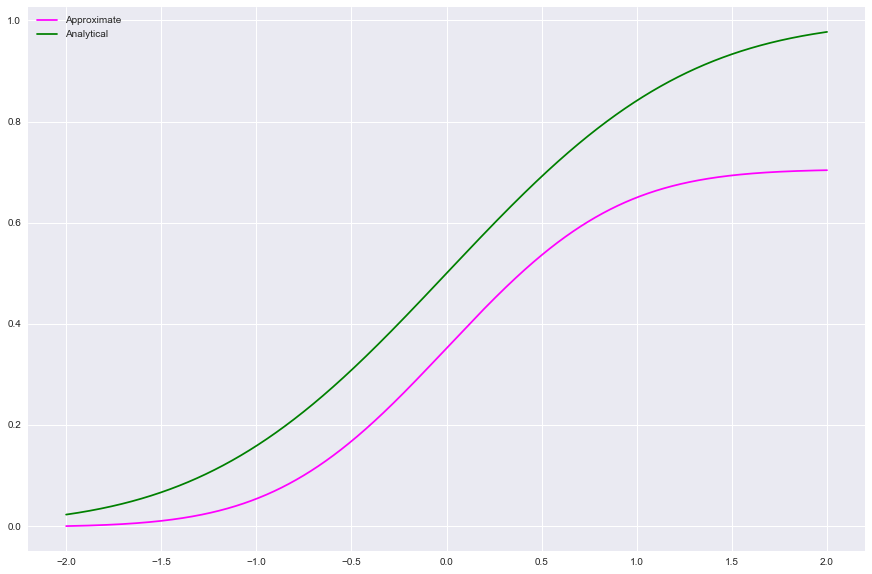

In [16]:
from scipy.stats import norm
plt.figure(figsize=(15,10))
plt.plot(x[1::], cum, label='Approximate',color='magenta')
plt.plot(x, analytical, label='Analytical',color='green')
plt.legend(loc='best')
plt.show()

In [17]:
error = np.mean(cum-analytical[1::])
print(error)

-0.14810043849391422
